In [1]:
import networkx as nx
import igraph
import pandas as pd
import pylab as plt
import numpy as np
import Bio
import seaborn as sns

In [11]:
plt.rcParams["figure.figsize"] = 10, 8
sns.set_style("whitegrid")

# Yeast age heatmap using blast ages

In [3]:
yeast_data = pd.read_csv('../data/yeast.txt', sep='\t')
print(yeast_data.shape)
yeast_data.head()

(12873, 2)


,Tf,Tg
0,YAL051W,YAL016W
1,YAL051W,YAL034WA
2,YAL051W,YAL035CA
3,YAL051W,YAL035W
4,YAL051W,YAL036C


In [4]:
yeast_blast_ages = pd.read_csv('../data/genes_lists/yeast/yest_gene_ages.txt', 
                               sep='\t', 
                               header=None, 
                               names=['Tf', 'Age'])
yeast_blast_ages.head()

,Tf,Age
0,YDL003W,Eukaryota
1,YKR060W,Opisthokonta
2,YMR254C,Saccharomyces
3,YEL059W,Saccharomyces
4,YHR030C,Eukaryota


In [5]:
yeast_data['Tf_age'] = yeast_data.merge(yeast_blast_ages, how='left', on=['Tf']).Age

yeast_blast_ages = yeast_blast_ages.rename(columns = {'Tf':'Tg'})
yeast_data['Tg_age'] = yeast_data.merge(yeast_blast_ages, how='left', on=['Tg']).Age

yeast_data[['Tg_age', 'Tf_age']] = yeast_data[['Tg_age', 'Tf_age']].replace(np.nan, 'no info')

In [6]:
yeast_data.head()

,Tf,Tg,Tf_age,Tg_age
0,YAL051W,YAL016W,Ascomycota,Eukaryota
1,YAL051W,YAL034WA,Ascomycota,no info
2,YAL051W,YAL035CA,Ascomycota,no info
3,YAL051W,YAL035W,Ascomycota,Eukaryota
4,YAL051W,YAL036C,Ascomycota,Eukaryota


## yeast plot

In [7]:
heatmap_y = pd.crosstab(yeast_data.Tf_age, yeast_data.Tg_age, normalize=True)
heatmap_y

Tg_age,Ascomycota,Eukaryota,Opisthokonta,Saccharomyces,Saccharomycetaceae,no info
Tf_age,,,,,,
Ascomycota,0.019654,0.114736,0.018333,0.054843,0.004195,0.009555
Eukaryota,0.029286,0.168492,0.022139,0.088169,0.009477,0.018644
Opisthokonta,0.016935,0.094151,0.013672,0.046065,0.003962,0.009555
Saccharomyces,0.021052,0.130195,0.017867,0.062068,0.006137,0.013594
Saccharomycetaceae,0.000621,0.003496,0.000311,0.001554,0.000155,0.000855
no info,0.000078,0.000000,0.000000,0.000078,0.000000,0.000078


Text(0.5, 1.0, 'with clusterization coefficients')

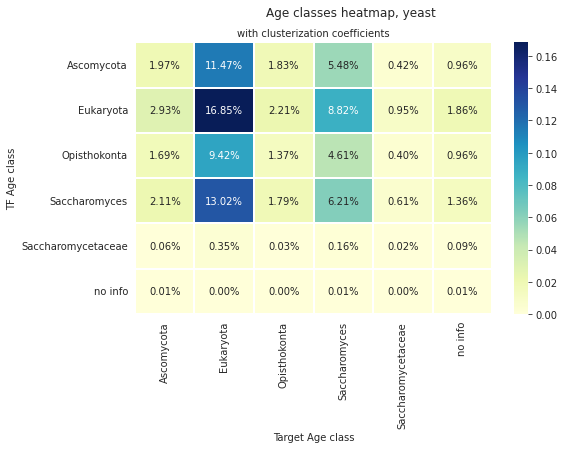

In [66]:
x_axis_labels = ['Ascomycota', 'Eukaryota', 'Opisthokonta', 'Saccharomyces', 'Saccharomycetaceae'] # labels for x-axis
y_axis_labels = ['Ascomycota', 'Eukaryota', 'Opisthokonta', 'Saccharomyces', 'Saccharomycetaceae'] # labels for y-axis
    
x_axis_labels.append('no info')
y_axis_labels.append('no info')

s = sns.heatmap(heatmap_y,
                xticklabels=x_axis_labels, 
                yticklabels=y_axis_labels,
                annot=True, 
                fmt=".2%",
                cmap="YlGnBu",
                linewidths=1.5)

s.set(xlabel='Target Age class', ylabel='TF Age class')
#plt.setp(s.get_xticklabels(), rotation=70)

plt.suptitle('Age classes heatmap, yeast')
plt.title('with clusterization coefficients', size=10)

In [71]:
tf_ages_count = yeast_data.groupby(['Tf', 'Tf_age'], as_index=0).count().groupby('Tf_age', as_index=0).count()[['Tf_age', 'Tf']]
tg_ages_count = yeast_data.groupby(['Tg', 'Tg_age'], as_index=0).count().groupby('Tg_age', as_index=0).count()[['Tg_age', 'Tg']]

Text(0.5, 1.0, 'Age classes heatmap, yeast')

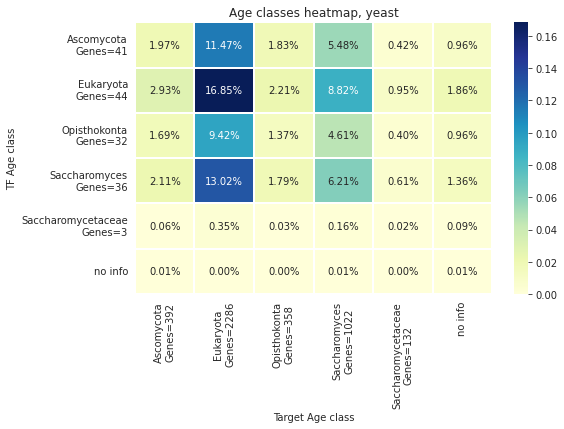

In [74]:
plt.rcParams["figure.figsize"] = 8, 5

xlabels = ['Ascomycota', 'Eukaryota', 'Opisthokonta', 'Saccharomyces', 'Saccharomycetaceae'] # labels for x-axis
ylabels = ['Ascomycota', 'Eukaryota', 'Opisthokonta', 'Saccharomyces', 'Saccharomycetaceae'] # labels for y-axis
    
x_axis_labels = []
y_axis_labels = []

for label in xlabels:
    x_axis_labels.append(f'{label}\nGenes={tg_ages_count[tg_ages_count.Tg_age == label].Tg.iloc[0]}')
    
x_axis_labels.append('no info')
    
for label in ylabels:
    y_axis_labels.append(f'{label}\nGenes={tf_ages_count[tf_ages_count.Tf_age == label].Tf.iloc[0]}')

y_axis_labels.append('no info')

s = sns.heatmap(heatmap_y,
                xticklabels=x_axis_labels, 
                yticklabels=y_axis_labels,
                annot=True, 
                fmt=".2%",
                cmap="YlGnBu",
                linewidths=1.5)

s.set(xlabel='Target Age class', ylabel='TF Age class')
#plt.setp(s.get_xticklabels(), rotation=70)
plt.title('Age classes heatmap, yeast')

#s.figure.savefig('../data/03_plots/yeast_swiss_blast_heatmap.png')
#plt.show()
#plt.savefig('../data/03_plots/yeast_swiss_blast_heatmap.png')
#plt.close()

In [9]:
classes = ['no info', 'Eukaryota', 'Opisthokonta', 'Ascomycota', 'Saccharomycetaceae', 'Saccharomyces']

yeast_data['Tg_age_int'] = yeast_data['Tg_age'].apply(lambda x: classes.index(x))
yeast_data['TF_age_int'] = yeast_data['Tf_age'].apply(lambda x: classes.index(x))


yeast_data['age_length'] = np.where((yeast_data['TF_age_int'] == 0) | (yeast_data['Tg_age_int'] == 0),
                                     -1,
                                     abs(yeast_data['TF_age_int'] - yeast_data['Tg_age_int']))

# no info to NAN
yeast_data['age_length'] = yeast_data['age_length'].replace({-1: np.nan})

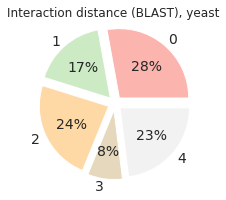

In [185]:
plt.rcParams["figure.figsize"] = 3, 3

idx = [0, 1, 2, 3, 4]
counts = pd.Series(yeast_data['age_length'].value_counts(normalize=True) * 100)
counts.index = counts.index.astype('int64')
counts = counts[idx]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)
counts.plot(kind='pie', fontsize=14, colormap="Pastel1", explode=explode,  autopct='%.0f%%')
plt.axis('equal')
plt.ylabel('')
plt.title('Interaction distance (BLAST), yeast')
#plt.legend(labels=counts.index, loc="best")
plt.show()
#plt.savefig('../data/03_plots/yeast_swiss_blast_pie.png')
#plt.close()

In [159]:
ages_list = ['Eukaryota', 'Opisthokonta', 'Ascomycota', 'Saccharomycetaceae', 'Saccharomyces',  'no info']
tf_tg_count = heatmap_y.copy()

for tf_age in ages_list:
    for tg_age in ages_list:
        new_table = yeast_data[(yeast_data.Tg_age == tg_age) & (yeast_data.Tf_age == tf_age)]
        if new_table[['Tf']].nunique().iloc[0] != 0:
            new_value = new_table[['Tg']].nunique().iloc[0] / new_table[['Tf']].nunique().iloc[0]
        else:
            new_value = 0
        tf_tg_count.loc[tf_age, tg_age] = new_value

In [160]:
tf_tg_count

Tg_age,Ascomycota,Eukaryota,Opisthokonta,Saccharomyces,Saccharomycetaceae,no info
Tf_age,,,,,,
Ascomycota,5.294118,24.675000,4.611111,13.514286,2.150000,3.142857
Eukaryota,5.536585,30.000000,4.641026,14.547619,2.176471,3.184211
Opisthokonta,5.960000,27.806452,5.565217,14.407407,2.388889,3.458333
Saccharomyces,5.787879,32.861111,5.483871,15.257143,2.240000,4.571429
Saccharomycetaceae,2.666667,15.000000,4.000000,10.000000,2.000000,5.500000
no info,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000


Text(0.5, 1.0, 'TG/TF heatmap, yeast')

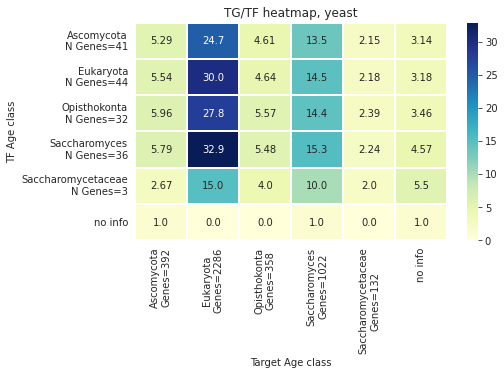

In [184]:
plt.rcParams["figure.figsize"] = 7, 4

xlabels = ['Ascomycota', 'Eukaryota', 'Opisthokonta', 'Saccharomyces', 'Saccharomycetaceae'] # labels for x-axis
ylabels = ['Ascomycota', 'Eukaryota', 'Opisthokonta', 'Saccharomyces', 'Saccharomycetaceae'] # labels for y-axis
    
x_axis_labels = []
y_axis_labels = []

for label in xlabels:
    x_axis_labels.append(f'{label}\nGenes={tg_ages_count[tg_ages_count.Tg_age == label].Tg.iloc[0]}')
    
x_axis_labels.append('no info')
    
for label in ylabels:
    y_axis_labels.append(f'{label}\nN Genes={tf_ages_count[tf_ages_count.Tf_age == label].Tf.iloc[0]}')

y_axis_labels.append('no info')

s = sns.heatmap(tf_tg_count,
                xticklabels=x_axis_labels, 
                yticklabels=y_axis_labels,
                annot=True, 
                fmt=".3",
                cmap="YlGnBu",
                linewidths=1.5)

s.set(xlabel='Target Age class', ylabel='TF Age class')
#plt.setp(s.get_xticklabels(), rotation=70)

plt.title('TG/TF heatmap, yeast')